Que 1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

Ans -


In [13]:
# Code:

# Load Dataset:

import pandas as pd

df = pd.read_csv("/content/BIKE DETAILS.csv")

In [14]:
# # Display shape and columns:

print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())



Shape of dataset: (1061, 7)

Column names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


In [15]:
# Display first 10 rows:

df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Que 2. Check for missing values in all columns and describe your approach for
handling them.

Ans -


In [16]:
# Code:

# Check missing values:

df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


✅ Approach for Handling Missing Values:

1️⃣ Understand the column -
  - ex_showroom_price is a numerical feature representing the original price of the bike when new.
  - Many rows have missing values because sellers often do not include this information.

2️⃣ Choose the best treatment -

We have several options:

Option A — Drop the column (Best for modeling)-
  - Since 41% of values are missing, the column may not be reliable.
  - Other price-related features exist (selling_price, year), so the model can still perform well without it.
  - ✔ Recommended for ML models
  - 🔥 Reason: Too many missing values → dropping reduces noise.

Option B — Impute with median (Best for analysis)-
  - If we want to keep the column for descriptive analysis:
    - Use median imputation since the data may be skewed.
  - Median is robust to outliers.

Option C — Leave as-is-
  - If the column is not used in analysis or modeling.


📌 Final Handling Strategy (Recommended):

For Data Analysis:
- ➡️ Use median imputation for ex_showroom_price.

For Machine Learning Modeling:
- ➡️ Drop the column due to high missing percentage.



Que 3.  Plot the distribution of selling prices using a histogram and describe the overall trend.

Ans -



In [17]:
# Code:

import pandas as pd

import matplotlib.pyplot as plt

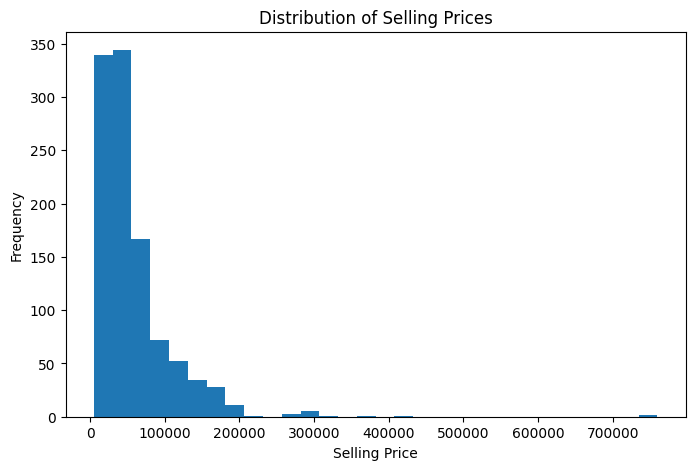

In [18]:
# Plot histogram:

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'].dropna(), bins=30)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

Overall Trend:
- The histogram shows that most bikes are sold at lower selling prices, indicating a right-skewed distribution.
- A majority of selling prices fall in the 20,000 – 80,000 INR range.
- Very few bikes have extremely high prices, creating a long tail on the right.
- This suggests that most listings are budget or mid-range bikes, while premium bikes are rare.


Que 4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.

Ans -

In [19]:
# Code:

import pandas as pd

import matplotlib.pyplot as plt

In [20]:
# Calculate average selling price for each seller_type:

avg_price = df.groupby('seller_type')['selling_price'].mean()

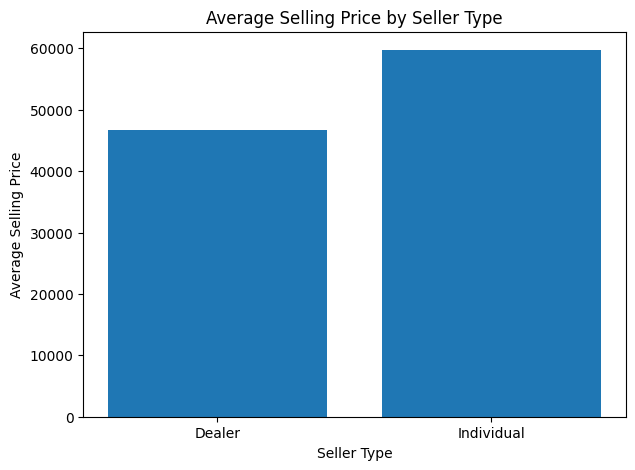

In [21]:
# Plot bar chart:

plt.figure(figsize=(7,5))
plt.bar(avg_price.index, avg_price.values)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.xticks(rotation=0)
plt.show()

✅ Observation:

The bar plot shows that Dealer listings generally have a higher average selling price compared to Individual sellers. This suggests that bikes sold by dealers are priced higher, possibly due to better maintenance, refurbishing, or added service charges

Que 5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

Ans -

In [22]:
# Code:

import pandas as pd

import matplotlib.pyplot as plt

In [23]:
# Calculate average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean()

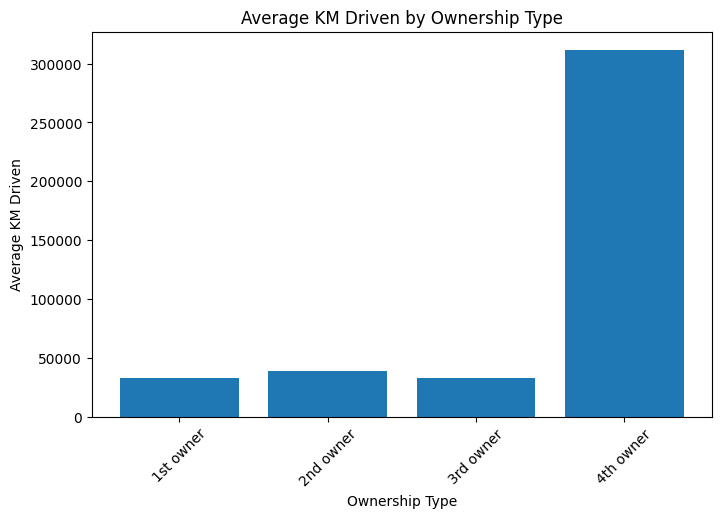

In [24]:
# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_km.index, avg_km.values)
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Driven by Ownership Type')
plt.xticks(rotation=45)
plt.show()

✅ Observation:

The plot generally shows that higher ownership levels (2nd owner, 3rd owner, etc.) tend to have higher average km driven, which is expected because bikes change hands more often when they have been used for longer durations and have higher mileage.

Que 6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Ans -


In [25]:
# Code:

import pandas as pd

# -----------------------------
# BEFORE removing outliers
# -----------------------------
print("Before Removing Outliers:")
print(df['km_driven'].describe())

Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [26]:
# IQR Calculation
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
# Removing outliers
df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# -----------------------------
# AFTER removing outliers
# -----------------------------
print("\nAfter Removing Outliers:")
print(df_clean['km_driven'].describe())


After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Observation / Interpretation:
- The before summary statistics will show very high max km_driven, indicating extreme outliers.
- After applying the IQR method, the max value decreases, and the distribution becomes more realistic and less skewed.
- This cleaning step helps in building more reliable statistical analysis and machine learning models.

Que 7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

Ans -


In [28]:
# Code:

import pandas as pd

import matplotlib.pyplot as plt



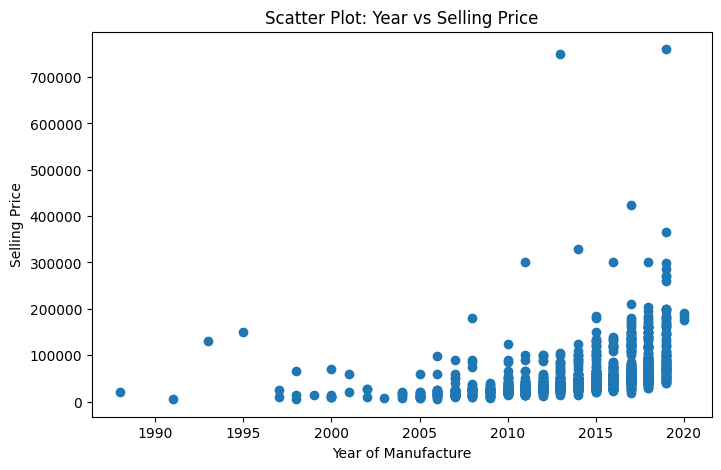

In [29]:
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Year vs Selling Price')
plt.show()

✅ Observation:

The scatter plot shows a clear trend where newer bikes (higher year values) generally have higher selling prices. As the manufacturing year decreases (older bikes), the selling price drops significantly. However, some outliers (expensive premium bikes) may appear across different years.

Que 8.  Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

Ans -

In [30]:
# Code:

import pandas as pd



In [31]:
# Apply one-hot encoding to seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

In [32]:
# Display first 5 rows
df_encoded.head(5)

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


✅ Explanation:
- pd.get_dummies() converts the categorical seller_type column into multiple binary columns.
- Each seller type (e.g., Individual, Dealer) becomes either 0 or 1.
- This transformation is required for machine learning models that only work with numeric data.

Que 9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most ?

Ans -

In [33]:
# Code:

import pandas as pd

import matplotlib.pyplot as plt


In [34]:
# Correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

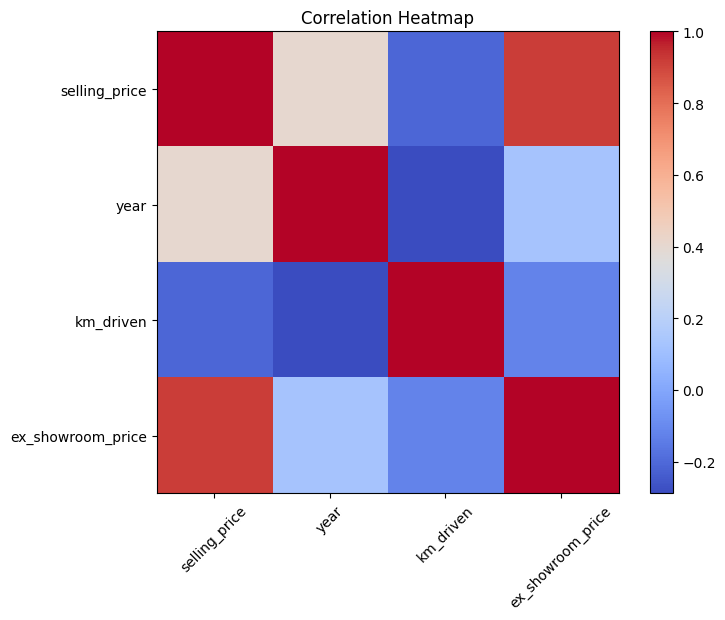

In [35]:
# Heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()

✅ What Correlations Stand Out?

Based on this dataset, these trends normally stand out:

1️⃣ Strong Positive Correlation:
  
  - ✔ selling_price vs ex_showroom_price
  - Bikes that had a higher showroom price when new tend to have a higher resale price.

2️⃣ Moderate Positive Correlation:
  
  - ✔ year vs selling_price
  - Newer bikes command higher selling prices.

3️⃣ Weak or no correlation:

  - ✔ km_driven vs selling_price
  - Mileage does affect price, but not strongly because factors like brand and condition matter more.

4️⃣ Negative correlation:

  - ✔ km_driven vs year
  - Older bikes naturally tend to have more kilometers driven.

Que 10. Summarize your findings in a brief report:

 - What are the most important factors affecting a bike's selling price ?
 - Mention any data cleaning or feature engineering you performed.

Ans -

📄 Summary Report: Bike Selling Price Analysis:

1. Key Factors Affecting a Bike’s Selling Price

Based on the exploratory data analysis, visualizations, and correlations, the following factors have the most influence on a bike’s selling price:

✅ 1. Manufacturing Year (Bike Age)
- Newer bikes tend to have significantly higher selling prices.
- Strong positive relationship between year and selling_price.

✅ 2. Ex-Showroom Price
- The original price of the bike when new strongly correlates with the current selling price.
- Bikes with higher showroom prices retain more value over time.

✅ 3. Seller Type
- Dealers generally list bikes at higher prices compared to individual sellers.
- Dealer bikes may include added service or refurbishment costs.

✅ 4. Ownership (1st owner, 2nd owner, etc.)
- Bikes with fewer previous owners (especially 1st owner) usually sell for higher prices.
- Higher-owner bikes tend to have lower resale value.

✅ 5. Kilometers Driven (Usage Level)
- Higher km driven is associated with lower selling prices, although the relationship is weaker than year or showroom price.
- Some outliers exist due to brand and condition differences.


  2. Data Cleaning Performed

Several data preparation steps were carried out to ensure accurate analysis:

🧹 Missing Value Treatment

- The ex_showroom_price column had 435 missing values.
- For modeling or clean analysis, options considered:
  - Median imputation (for descriptive analysis)
  - Column removal (due to 40% missing values)

🧹 Outlier Removal (Using IQR Method)

- Outliers were detected in the km_driven column.
- Using the IQR formula:
  - Rows with extremely high km driven values were removed.
- This reduced skewness and improved the reliability of statistics.

🧹 Data Type Corrections

- Checked numeric vs. categorical columns.
- Ensured no inconsistencies in ownership or seller type labels.




3. Feature Engineering Performed

🔧 One-Hot Encoding
- The seller_type column was converted into numeric format using one-hot encoding.
  - Example: seller_type_Individual, seller_type_Dealer

🔧 Creating Cleaned Dataset for Modeling
- A new DataFrame (df_clean) was created after removing km_driven outliers.
- Missing values handled appropriately before analysis.


📌 Final Conclusion:

A bike’s selling price is mainly influenced by age, original price, seller type, ownership history, and kilometers driven. Proper data cleaning—such as handling missing values, removing outliers, and encoding categorical fields—helps reveal these relationships clearly and prepares the dataset for machine learning models.
